# The Sparks Foundation

##Task-1 Prediction Using Supervised ML

##Author: Smruti Bhagat

##Problem Statement: Predict Score of a student who studies 9.25 hours per day


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Preparing the Dataset

In [3]:
#Loading the Dataset
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
print("Data loaded successfully")

score_data.head(10)

Data loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##Data Visualization

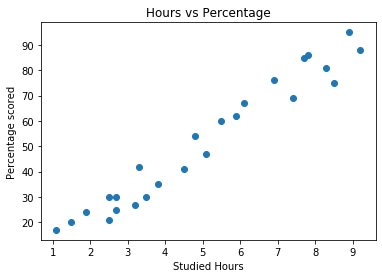

In [6]:
#Plotting the graph for the dataset provided
#Hours Vs Percentage of Scores
plt.scatter(score_data['Hours'], score_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Percentage scored')
plt.show()

Further we will create two variables in order to split the dataset into tranining and test sets for applying linear regression

In [9]:
x = score_data.iloc[:,:-1].values
y = score_data.iloc[:,1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now as we have made two variables according to the data and the target variable that is to be predicted we will perform the supervised machine learning algorithm i.e. Linear Regression for this problem.

## Splitting the dataset for Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)

As now we have already split the dataset into training and test sets further we will train the Regression model according to the training set in order to create a model that can help predict the target values.

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

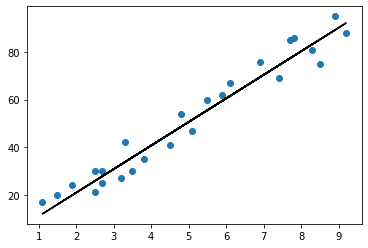

In [13]:
#Plotting the regression line based on the model usong the original dataset
line = model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x, line,color = 'black');
plt.show()

In [23]:
#Prdeicting the target scores using the test values
predicted_scores = model.predict(x_test)
print(predicted_scores)

[15.9477618  32.77394723 74.344523   25.84551793 59.49788879 38.71260091
 19.90686425 78.30362545 69.39564493 11.98865934]


In [24]:
#Creating a dataframe for the predicted target scores and the actual scores obtained
model_data = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': predicted_scores})  
model_data

,Actual Scores,Predicted Scores
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


In [25]:
#Predicting the scores for a student who studies for 9.25 hours per day
model.predict([[9.25]])


array([92.65537185])

## Model Evaluation

Model Evaluation helps us to know if the model we created predicts the results accurately
There are 3 basic Metrics that can be used for model evaluation:
1. Mean Absolute Error
2. Mean Square Error
3. R Square 

In [26]:
#Calculating Mean Absolute Error
from sklearn import metrics  
print('Mean Absolute Error value for the model is:', metrics.mean_absolute_error(y_test, predicted_scores))

Mean Absolute Error: 4.894510863410609


In [29]:
#Calculating Mean Square Error
from sklearn import metrics  
print('Mean Square Error value for the model is:', metrics.mean_squared_error(y_test, predicted_scores))

Mean Square Error: 26.034569687682243


In [27]:
from sklearn.metrics import r-square
print("The R-Square value for the model is: ",r-square(y_test,predicted_scores))

The R-Square of my model is:  0.956640847232559


### Results: Considering the Linear Regression model to predict the scores it can be said that a student that studies for 9.25 hrs per day can score 92.65